<a href="https://colab.research.google.com/github/MengxuanMa2016/Data_Visualization_Python/blob/master/Efficiency_Assessment_Results_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Efficiency Assessment Result Visualization**

The purpose of this notebook is to visaulize the processed assessment results of a stroke player. 

Main steps: 
a. Load the generetated assessment file in csv. 

## Load the necessary libraries

In [0]:
from numpy import genfromtxt
import numpy as np, pandas as pd
from IPython.display import display, HTML
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns
import csv

import scipy.stats as stats
import statsmodels as sm

import warnings
warnings.filterwarnings('ignore')

## Link the notebook to the google drive to import the file

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# list data files are available in the data directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "/content/gdrive/My Drive/Assessment_Data_Visualization/"

from subprocess import check_output
print(check_output(["ls", path]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Efficiency_Assessment_Results_Visualization.ipynb
HS1-ALL-efficiency_metrics012019.csv
HS1-ALL-extent_metrics012019.csv
HS1-ALL-speedsmoothness_metrics012019.csv
HS1-ALL-trial_list012019.csv
HS2-ALL-efficiency_metrics011819.csv
HS2-ALL-extent_metrics011819.csv
HS2-ALL-speedsmoothness_metrics011819.csv
HS2-ALL-trial_list011819.csv
HS4-ALL-efficiency_metrics011719.csv
HS4-ALL-extent_metrics011719.csv
HS4-ALL-speedsmoothness_metrics011719.csv
HS4-ALL-trial_list011719.csv
HS5-ALL-efficiency_metrics011619.csv
HS5-ALL-extent_metrics011619.csv
HS5-ALL-speedsmoothness_metrics011619.csv
HS5-ALL-trial_list011619.csv
HS7-ALL-efficiency_metrics011819.csv
HS7-ALL-extent_metrics011819.csv
HS7-ALL-speedsmoothness_metrics011819.csv
HS7-ALL-trial_list011819.csv
HS8-ALL-efficiency_metrics011819.csv
HS8-ALL-extent_metrics011819.csv
HS8-ALL-speedsmoothness_metrics011819.csv
HS8-ALL-trial_list011819.csv
KL30-ALL-efficiency_metrics012019.csv
KL30-ALL-extent_metrics012019.csv
KL30-ALL-speedsmoothness_metrics

In [0]:
stroke_data_file = 'HS2-ALL-efficiency_metrics011819.csv'
stroke_trial_file = 'HS2-ALL-trial_list011819.csv'
healthy_data_file = 'KL30-ALL-efficiency_metrics012019.csv'

## Some functions

In [0]:
def read_trial_info(trial):
    label = []
    with open(trial, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            label.append(row[0])
    partial_label = [x.split("_") for x in label]
      
    return partial_label

In [0]:
def read_joint_file(trial):
    """
    read_joint_file method: read the joint file(.csv) to an array
    :param
        trial: directory of the file to be read
    :return:
        an array of data read from the file.
    """
    print("Reading the file...")

    # read the actual data from .csv file
    file_data = genfromtxt(trial, delimiter=',')
    # print(type(file_data))

    data_raw = file_data[:]

    print("Finish Reading!")

    return data_raw

In [0]:
def indexing_by_datatime(dataframe):
  """
  Sort the rows of the input dataframe by the data and time. 
  Add an index column for sorted sequence.
  input: A dataframe with _Date and _Time columns included.
  return: The dataframe with rows sorted.
  """
  
  dataframe.sort_values(['_Date','_Time'],ascending=[True, True])
  dataframe['index'] = range(1, len(dataframe) + 1)
  
  return dataframe

## Import the base line: Healthy subjects assessment results

In [8]:
healthy_data = read_joint_file(path + healthy_data_file)
# print (type(healthy_data))

Reading the file...
Finish Reading!


In [9]:
headers = ['Path_Ratio_2d_Left',	'Path_Ratio_2d_Right',	'Sway_Dist_2d_Left',	'Sway_Dist_2d_Right',	'Path_Ratio_3d_Left',	'Path_Ratio_3d_Right',	'Sway_Dist_3d_Left', 'Sway_Dist_3d_Right']

health_trial_data_dict = dict(zip(headers, healthy_data.T))

health_df = pd.DataFrame(health_trial_data_dict)

print("Display the first five rows of the healthy subject table")
display(health_df[:5])

Display the first five rows of the healthy subject table


,Path_Ratio_2d_Left,Path_Ratio_2d_Right,Path_Ratio_3d_Left,Path_Ratio_3d_Right,Sway_Dist_2d_Left,Sway_Dist_2d_Right,Sway_Dist_3d_Left,Sway_Dist_3d_Right
0,0.431566,0.584955,0.475128,0.388764,233.295917,178.075036,265.968729,181.584352
1,0.991658,0.966981,0.860318,0.940132,16.590526,9.229096,52.567149,31.115953
2,0.947530,0.995806,0.794743,0.848309,18.316861,9.879494,64.860453,52.388726
3,0.993544,0.996618,0.802868,0.806571,11.312686,5.927629,63.382021,55.880210
4,0.867409,0.943322,0.693972,0.827436,26.639132,9.069321,68.069082,51.604957


## Import the stroke data

In [10]:
stroke_data = read_joint_file(path + stroke_data_file)

print("stroke data:\n" + str(stroke_data[:3,:]))
print(stroke_data.shape)


trail_info = read_trial_info(path + stroke_trial_file)
trail_info = np.asarray(trail_info)
print("trail_info: \n" + str(trail_info[:5,:]))

Reading the file...
Finish Reading!
stroke data:
[[  0.298619   0.479203  91.830021  67.751673   0.212321   0.53821
  166.005211  63.539319]
 [  0.378951   0.705728 162.340129  18.089093   0.382903   0.521923
  187.79659   50.581384]
 [  0.228322   0.247417 143.092305 145.522467   0.478913   0.254047
  187.365299 196.856654]]
(141, 8)
trail_info: 
[['10-24-2013' '02-12-PM' 'Janet' 'Ronlyreaching']
 ['10-29-2013' '04-28-PM' 'Janet' 'Ronlyreaching']
 ['10-29-2013' '05-48-PM' 'Janet' 'sittingoutofBOS']
 ['10-31-2013' '06-30-PM' 'Janet' 'Ronlyreaching']
 ['11-02-2013' '04-55-PM' 'Janet' 'tallkneeling']]


## Build up a pandas table of the stroke assessment data

In [37]:
headers = ['_Date','_Time','_Player','_Type', 'Path_Ratio_2d_Left',	'Path_Ratio_2d_Right',	'Sway_Dist_2d_Left',	'Sway_Dist_2d_Right',	'Path_Ratio_3d_Left',	'Path_Ratio_3d_Right',	'Sway_Dist_3d_Left', 'Sway_Dist_3d_Right']

stroke_trial_data = np.concatenate((trail_info, stroke_data), axis=1)
# print("trial with data: \n" + str(stroke_trial_data[:3,0:3]))

stroke_trial_data_dict = dict(zip(headers, stroke_trial_data.T))

stroke_df = pd.DataFrame(stroke_trial_data_dict)
# # print(stroke_df.head())

display(stroke_df[:5])

,Path_Ratio_2d_Left,Path_Ratio_2d_Right,Path_Ratio_3d_Left,Path_Ratio_3d_Right,Sway_Dist_2d_Left,Sway_Dist_2d_Right,Sway_Dist_3d_Left,Sway_Dist_3d_Right,_Date,_Player,_Time,_Type
0,0.298619,0.479203,0.212321,0.53821,91.830021,67.751673,166.005211,63.539319,10-24-2013,Janet,02-12-PM,Ronlyreaching
1,0.378951,0.705728,0.382903,0.521923,162.340129,18.089093,187.79659,50.581384,10-29-2013,Janet,04-28-PM,Ronlyreaching
2,0.228322,0.247417,0.478913,0.254047,143.092305,145.522467,187.365299,196.856654,10-29-2013,Janet,05-48-PM,sittingoutofBOS
3,0.316712,0.173743,0.369144,0.228161,210.363551,75.975357,185.047465,58.60688,10-31-2013,Janet,06-30-PM,Ronlyreaching
4,0.259369,0.356831,0.281281,0.354112,149.010301,147.636115,192.45747,209.588466,11-02-2013,Janet,04-55-PM,tallkneeling


## Determine the metric for analysis

In [0]:
# metrics for assessing the movement efficiency 
# 'Path_Ratio_2d_Left',	'Path_Ratio_2d_Right',	'Sway_Dist_2d_Left',	'Sway_Dist_2d_Right',	'Path_Ratio_3d_Left',	'Path_Ratio_3d_Right',	'Sway_Dist_3d_Left', 'Sway_Dist_3d_Right'

metric_left = 'Sway_Dist_3d_Left'
metric_right = 'Sway_Dist_3d_Right'

## Determine the base line from the assessment results of healthy subjects

In [0]:
def compute_baseline(health_dataframe, metric_left, metric_right):
  """
  input parameters: 
  health_dataframe: the dataframe with left and right hand metric columns including.
  metric_left/right : the column name to compute the baseline. 
  
  return parameters:
  left/right_baseline: The average of the selected metric column.
  
  usage:
  left_baseline, right_baseline = compute_baseline(health_df, metric_left, metric_right)
  print("left baseline = {:f}, right baseline = {:f}.".format(left_baseline, right_baseline))
  """
  
  left_baseline = health_df[metric_left].mean()
  right_baseline = health_df[metric_right].mean()
  print("left baseline = {:f}, right baseline = {:f}.".format(left_baseline, right_baseline))
  
  return left_baseline, right_baseline

In [14]:
left_baseline, right_baseline = compute_baseline(health_df, metric_left, metric_right)
# print("left baseline = {:f}, right baseline = {:f}.".format(left_baseline, right_baseline))

left baseline = 110.356954, right baseline = 102.898361.


## Trend by game type

In [27]:
# list all the game types
print(stroke_df._Type.unique())

['Ronlyreaching' 'sittingoutofBOS' 'tallkneeling' 'Lonlystanding'
 'squathighlow' 'sittostand' 'R and L Standing']


In [0]:
selected_type = 'Lonlystanding'
stroke_one_game = stroke_df.loc[stroke_df['_Type'] == selected_type]
stroke_one_game = stroke_one_game[[metric_left,metric_right,'_Date','_Type','_Time']]

In [0]:
sorted_df = indexing_by_datatime(stroke_one_game)
# display(sorted_df)

## Plot the figures

In [0]:
def overtime_analysis(stroke_dataframe, metric_left, metric_right, baseline_dataframe=[]):
  
  plot_baseline = False
  # compute the baseline if the health dataframe is available.
  if len(baseline_dataframe) != 0 :
    plot_baseline = True
    left_baseline, right_baseline = compute_baseline(baseline_dataframe, metric_left, metric_right)
  else:
    print("Baseline is not available!")
    
  stroke_dataframe[metric_left]  = stroke_dataframe[metric_left].convert_objects(convert_numeric=True)
  stroke_dataframe[metric_right] = stroke_dataframe[metric_right].convert_objects(convert_numeric=True)
    
  # sort the rows of the analysis dataframe by data and time
  analysis_df = indexing_by_datatime(stroke_dataframe)
  
  fig = plt.figure()
  fig.set_size_inches(15.5, 8.5)
  ax = fig.add_subplot(111)
  sns.regplot(x='index', y=metric_left , data=analysis_df, order=2)
  sns.regplot(x='index', y=metric_right, data=analysis_df, order=2)

  if plot_baseline == True:
    plt.axhline(y= left_baseline , color = 'purple', linestyle='--')
    plt.axhline(y= right_baseline, color = 'blue'  , linestyle='--')

  plt.xticks(analysis_df['index'],analysis_df["_Date"],rotation = 90)
  
  plt.title("Hand path sway distance Assessment over time from oct to dec of Client HS2")
  plt.xlabel("trials recorded from october to december")
  plt.ylabel("path sway distance")

  ax.grid(False)

  plt.show()
  
  
  return analysis_df
  
  

left baseline = 110.356954, right baseline = 102.898361.


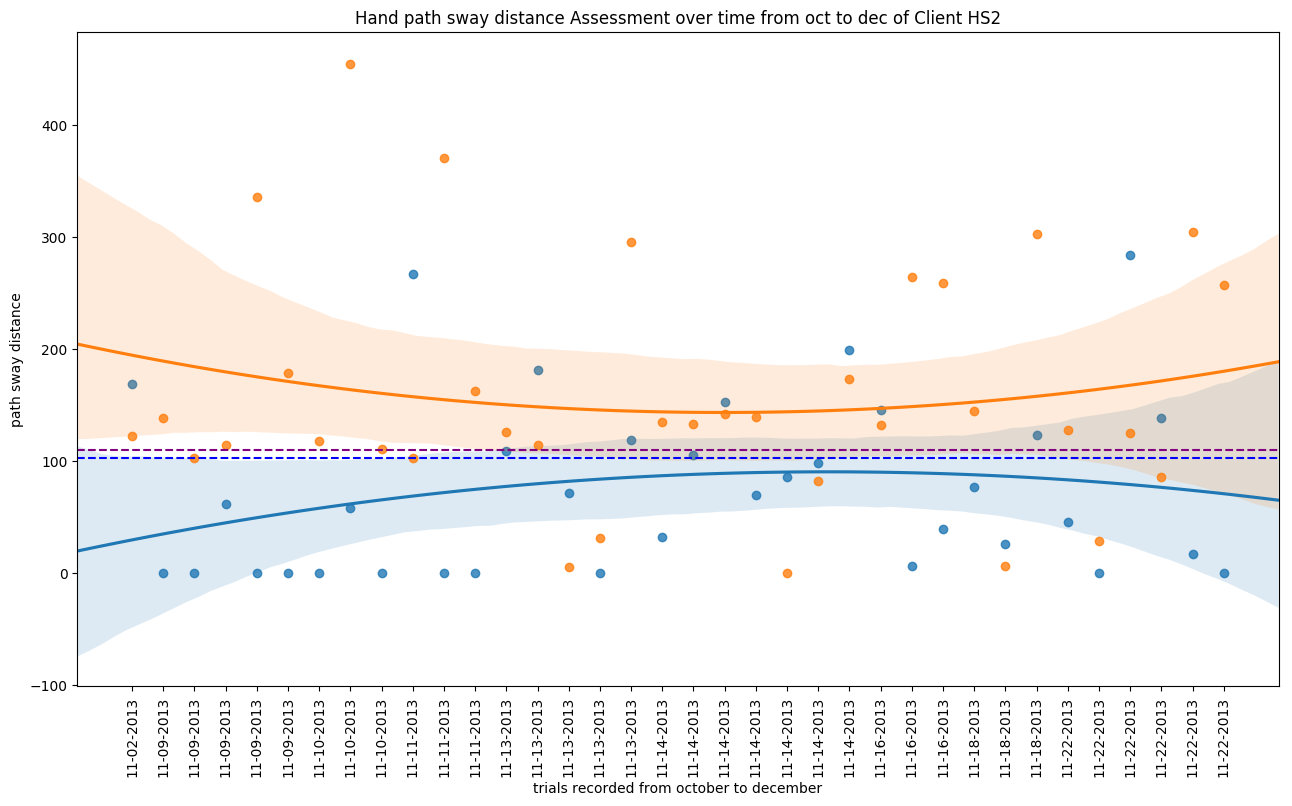

In [35]:
display_df = overtime_analysis(stroke_one_game, metric_left, metric_right, baseline_dataframe=health_df)

# display_df = overtime_analysis(stroke_df, metric_left, metric_right)

# display(display_df[:5])